## To do 
- [ ] Indiquer le nombre de modifications
- [ ] check bokeh 
- [ ] check seaborn

Suis arrivée à Perfect Epigram. 

À faire : 

- [ ] réorganiser les graph pandas 
- [ ] Mettre Bokeh avant perfect epigram 
- [ ] faire les viz de perfect epigram 


## Le projet Anthologie grecque

Depuis 2014, la Chaire de Recherche du Canada sur les Écritures Numériques porte le projet d'édition numérique collaborative de l'*Anthologie grecque*. Ce vaste corpus de la littérature grecque a traversé le temps et s'est inscrite sur nombreux de support et media. Au sein de la CRCEN seulement, plusieurs plateforme ont hébergé son contenu. 

Le projet se trouve désormais sur la plateforme [Anthologiagraeca](https://anthologiagraeca.org/). Celui-ci a bénéficié de l'aide d'environ 150 éditeur·ice·s qui opérèrent 12300 actions sur la plateforme (au 20 avril 2023). 

Ces contributions sont en réalité des *data*, que nous pouvons désormais manipuler et qui nous permettent d'appréhender l'*Anthologie* d'un autre œil, par le biais de visualisations notamment. Celles-ci ont un double avantage : 

### a. État d'avancement de la plateforme 

Plus la plateforme se remplit, plus il devient complexe d'avoir une vision d'ensemble sur l'état d'édition de la plateforme. L'encodage des données selon les standards de l'édition numérique et l'implémentation de l'[API](https://anthologiagraeca.org/api/) nous permettent de visualiser facilement ce qu'il reste à faire pour chacun des livres de l'Anthologie grecque, ou du moins de discerner des priorités. 

La question du statut ou du degré d'édition des épgirammes de la plateforme est décrit [ici](https://framagit.org/anthologie-palatine/anthologyontology/-/wikis/taskslist).

### b. Saisir la réalité de l'*AG* dans son ensemble 

L'*Anthologie* ne peut se concevoir que comme une œuvre linéaire. En effet, celle-ci est un regroupement d'hétérogènes, dialoguant entre eux par des liens, qu'ils soient tacites ou clairement marqués. 

Une édition numérique comme celle menée à la CRCEN permet une lecture plus cyclique du corpus, et les visualisations proposées ci-dessous offrent des synthèses variées des différentes facette du l'œuvre. 

## Ce site 

Ce site est écrit dans JupyterLab, généré en HTML avec Quarto, déployé sur GitHub Pages et mis à jour quotidiennement grâce à GitHub Actions. Le code est public. 

Dans la même optique, chaque figure ci-dessous est accompagnée de son code. 

## Prérequis 

Il convient tout d'abord d'importer les bibliothèques qui nous seront utiles tout le long de notre démonstration : 

In [5]:
import json
import requests
import csv
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

print("Import des librairies nécessaires")

Import des librairies nécessaires


## Récupérer les données de l'API 

Avant toute chose, récupérons les données de l'API, en tenant compte qu'elle est paginée. 

Grâce à GitHub action, nous faisons tourner ce Jupyter Notebook une fois par jour afin de mettre à jour les visualisations avec les nouvelles données encodées. 

Le code ci-dessous nous permet de récupérer les données de l'API, plus précisément l'endpoint ```passages``` qui nous intéresse. 

Nos données sont désormais stockées dans la liste ```api_data```. 

In [7]:
api_data = []

pagination = True

c = 0 

while pagination == True: 
    c = c+1
    param = {'page': c,}
    basic_url = 'https://anthologiagraeca.org/api/'
    endpoint = "passages"
    r = requests.get(basic_url + endpoint,param).json()
    if r['next'] is None:
        pagination = False
    for item in r['results']:
        api_data.append(item)

Cette commande nous a permis de stocker toutes les données de l'API dans la liste ```api_data```. 

Nous pouvons facilement vérifier cela en vérifiant la longueur de la liste : nous devrions obtenir 4134 résultats : le nombre d'épigrammes sur la plateforme. 

In [11]:
print("La liste api_data contient",len(api_data), "entrées")

La liste api_data contient 4134 entrées


Voyons également à quoi ressemble la structure des données : 

In [12]:
api_data[1]

{'id': 438,
 'book': {'url': 'https://anthologiagraeca.org/api/books/9/', 'number': 1},
 'fragment': 2,
 'sub_fragment': '',
 'url': 'https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:1.2/',
 'manuscripts': ['http://digi.ub.uni-heidelberg.de/iiif/2/cpgraec23%3A049.jpg/pct:12.466722876141418,19.26407429979108,58.60226718012693,8.23287268450456/full/0/default.jpg'],
 'texts': [{'url': 'https://anthologiagraeca.org/api/texts/1627/',
   'language': 'grc',
   'text': '\n                      θεῖος Ἰουστῖνος, Σοφίης πόσις, ᾧ πόρε Χριστὸς\n πάντα διορθοῦσθαι, καὶ κλέος ἐν πολέμοις,\nμητρὸς ἀπειρογάμοιο δόμον σκάζοντα νοήσας,\n σαθρὸν ἀποσκεδάσας τεῦξέ μιν ἀσφαλέως.\n'},
  {'url': 'https://anthologiagraeca.org/api/texts/1628/',
   'language': 'eng',
   'text': 'Inscribed on the Apse of Blachernae\n\nThe divine Justin, the husband of Sophia, to whom Christ granted the gift of restoring everything, and glory in war, finding that the temple of the Virgin Mother was tott

Nous pouvons en outre stocker ces données dans un fichier ```.json```. Vu que ces données sont retéléchargées chaque jour, nous ajoutons un paramètre pour renommer notre fichier en fonction du jour de téléchargement. 

In [14]:
current_date = datetime.datetime.now().date()
filename = 'api_json.json'
with open(filename, 'w') as js:
    json.dump(api_data, js)

## Stocker les données dans un csv pour les manipuler avec panda &#x1F43C;

Pandas est une bibliothèque Python permettant de manipuler et d'analyser des données, tout en proposant de simples visualisations. 

Si le panda &#x1F43C; se nourrit de bambou &#x1F33F;, notre Panda &#x1F40D; se nourrit plutôt de tableaux .csv &#x1F5A5;

Nous commencerons par créer un premier fichier .csv, intitulé ```main_info.csv``` dont les colonnes reprendront les informations suivantes : 

- l'URL de l'épigramme ; 
- le numéro de l'épigramme ; 
- le livre de l'épigramme ; 
- la présence ou non d'un manuscrit ; 
- le nombre de textes associés à l'épigramme ; 
- le nombre de mots-clés associés à l'épigramme ; 
- le nombre de scholies associés à l'épigramme ; 
- le nombre de commentaires associés à l'épigramme ; 


In [15]:
header = ['URL', 'epigram', 'book', 'manuscripts', 'texts', 'keywords', 'scholia', 'comments']

with open('main_info.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=header)
        writer.writeheader()
        for row in api_data:
            url = row.get('url', '')
            epigram = url.split('ag:')[1].split('/')[0] if 'ag:' in url else ''
            book = row.get('book', {}).get('number')
            manuscripts = True if row.get('manuscripts') else False
            texts = len(row.get('texts', []))
            keywords = len(row.get('keywords', []))
            scholia = len(row.get('scholia', []))
            comments = len(row.get('comments', []))
            writer.writerow({
            'URL': url,
            'epigram': epigram,
            'book': book,
            'manuscripts': manuscripts,
            'texts': texts,
            'keywords': keywords,
            'scholia': scholia,
            'comments': comments
        })

Le fichier ```main_info.csv``` a été créé ; nous pouvons désormais le lire et le manipuler.
Commençons par en afficher un échantillon aléatoire de 5 lignes : 

In [19]:
api_data_df = pd.read_csv('main_info.csv', delimiter=",")

api_data_df.sample(5)

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
393,https://anthologiagraeca.org/api/passages/urn:...,5.236,5,True,3,4,2,0
3608,https://anthologiagraeca.org/api/passages/urn:...,14.74,14,False,3,0,0,0
2816,https://anthologiagraeca.org/api/passages/urn:...,11.16,11,True,3,9,0,0
968,https://anthologiagraeca.org/api/passages/urn:...,7.140,7,True,4,10,3,1
1360,https://anthologiagraeca.org/api/passages/urn:...,7.527,7,True,4,6,2,0


## Focus sur les textes 

Dans cette section, nous nous intéresserons principalement aux nombre de textes qu'ont les épigrammes sur notre plateforme. 

Commençons dès lors par afficher dans notre table les données qui nous intéressent. 

In [20]:
api_data_df[['book','epigram','texts']]

,book,epigram,texts
0,1,1.1,4
1,1,1.2,4
2,1,1.3,4
3,1,1.4,4
4,1,1.5,4
...,...,...,...
4129,16,16.384,2
4130,16,16.385,2
4131,16,16.386,2
4132,16,16.387,2


Avant d'aller plus loin, nous pouvons déjà nous rendre compte et visualiser (sous plusieurs formes différentes) combien de textes ont les épigrammes:

In [21]:
api_data_df['texts'].value_counts()

3     1563
1      888
4      877
2      553
5      176
6       55
7        9
8        6
9        4
0        2
11       1
Name: texts, dtype: int64

La plupart des épigrammes, 1598, ont trois textes ; une épigramme possède même 11 textes ! Par contre, 888 épigrammes n'ont encore qu'un seul texte. 
Pour connaitre les épigrammes dont il est question, nous pouvons appliquer un filtre, comme ceci : 

In [22]:
eleven_texts_filter = api_data_df['texts'] == 11
one_text_filter = api_data_df['texts'] == 1

In [23]:
api_data_df[eleven_texts_filter]

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
1912,https://anthologiagraeca.org/api/passages/urn:...,9.70,9,True,11,0,1,0


In [24]:
api_data_df[one_text_filter]

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
133,https://anthologiagraeca.org/api/passages/urn:...,3.1,3,False,1,0,2,0
134,https://anthologiagraeca.org/api/passages/urn:...,3.2,3,False,1,0,0,0
135,https://anthologiagraeca.org/api/passages/urn:...,3.3,3,False,1,0,0,0
136,https://anthologiagraeca.org/api/passages/urn:...,3.4,3,False,1,0,0,0
137,https://anthologiagraeca.org/api/passages/urn:...,3.5,3,False,1,0,0,0
...,...,...,...,...,...,...,...,...
4121,https://anthologiagraeca.org/api/passages/urn:...,16.376,16,False,1,0,0,0
4122,https://anthologiagraeca.org/api/passages/urn:...,16.377,16,False,1,0,0,0
4123,https://anthologiagraeca.org/api/passages/urn:...,16.378,16,False,1,0,0,0
4124,https://anthologiagraeca.org/api/passages/urn:...,16.379,16,False,1,0,0,0


Mais le but de notre expérience est de visualiser nos données ; toujours avec ```Pandas``` dans un premier temps, affichons combien de textes ont les épigrammes : 

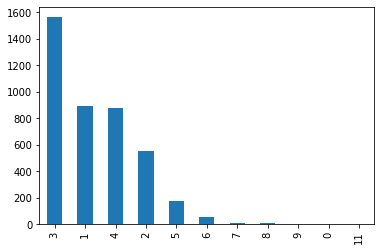

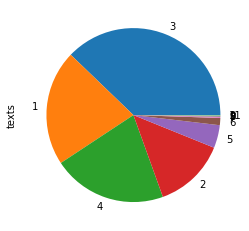

In [33]:
#| label: epigrams_texts
#| fig-cap: "Combien de textes ont les épigrammes?"
#| fig-subcap: 
#|   - "Une visualisation en *plots*,"
#|   - "et une autre en *pie*."
#| layout-ncol: 2





api_data_df['texts'].value_counts().plot(kind='bar')
plt.show()
api_data_df['texts'].value_counts().plot(kind='pie')
plt.show()

Pour résumer, quel est le nombre moyen de textes par épigramme ? Et quelle est la médiane de textes par épigramme ? 

In [56]:
print("les épigrammes ont en moyenne", api_data_df['texts'].mean(), "textes")

print("la médiane des textes par épigramme est de", api_data_df['texts'].median())

les épigrammes ont en moyenne 2.7960812772133528 textes
la médiane des textes par épigramme est de 3.0


Quelle est le nombre moyen de textes par épigramme selon les livres ? 

In [57]:
api_data_df[['book', 'texts']].groupby('book').mean()

,texts
book,
1,3.373984
2,2.000000
3,1.000000
4,4.800000
5,3.819355
6,3.030641
7,4.036939
8,3.364341
9,2.098676


Visualisons ce tableau dans un graphique qui nous indique le nombre moyen qu'ont les épigrammes de chacun des livres : 

<AxesSubplot:title={'center':"Moyenne des textes par épigrammes dans les livres de l'AG"}, xlabel='book'>

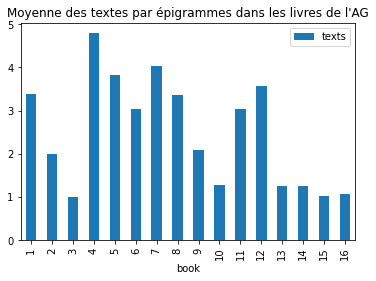

In [58]:
api_data_df[['book', 'texts']].groupby('book').mean().plot(kind='bar', title="Moyenne des textes par épigrammes dans les livres de l'AG")

Dans une même idée, nous pouvons montrer le nombre d'épigrammes par livre... 

<AxesSubplot:title={'center':'text'}>

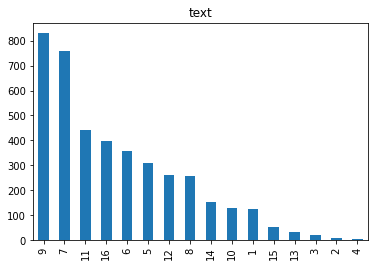

In [64]:
api_data_df['book'].value_counts().plot.bar(title='text')

In [71]:
book_counts = api_data_df['book'].value_counts()
book_counts_sorted = book_counts.sort_values(ascending=True)

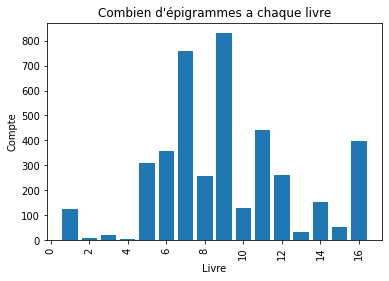

In [73]:
plt.bar(book_counts_sorted.index, book_counts_sorted)
plt.xlabel('Livre')
plt.ylabel('Compte')
plt.title("Combien d'épigrammes a chaque livre")
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x si nécessaire
plt.show()

## Perfect Epigram

In [33]:
mykw = []
for i in range(len(api_data)):
    book_ = api_data[i]['book']['number']
    count_ = len([i for i in api_data[i]['keywords']])
    url_ = api_data[i]['url']
    mykw.append({'book':book_,'count':count_, 'url':url_})
mykw_df = pd.DataFrame(mykw)

In [34]:
#df_ = mykw_df.groupby('count',as_index=False)['url'].agg(list)
#df_[df_['count']==53]['url'].tolist()

<AxesSubplot:xlabel='book'>

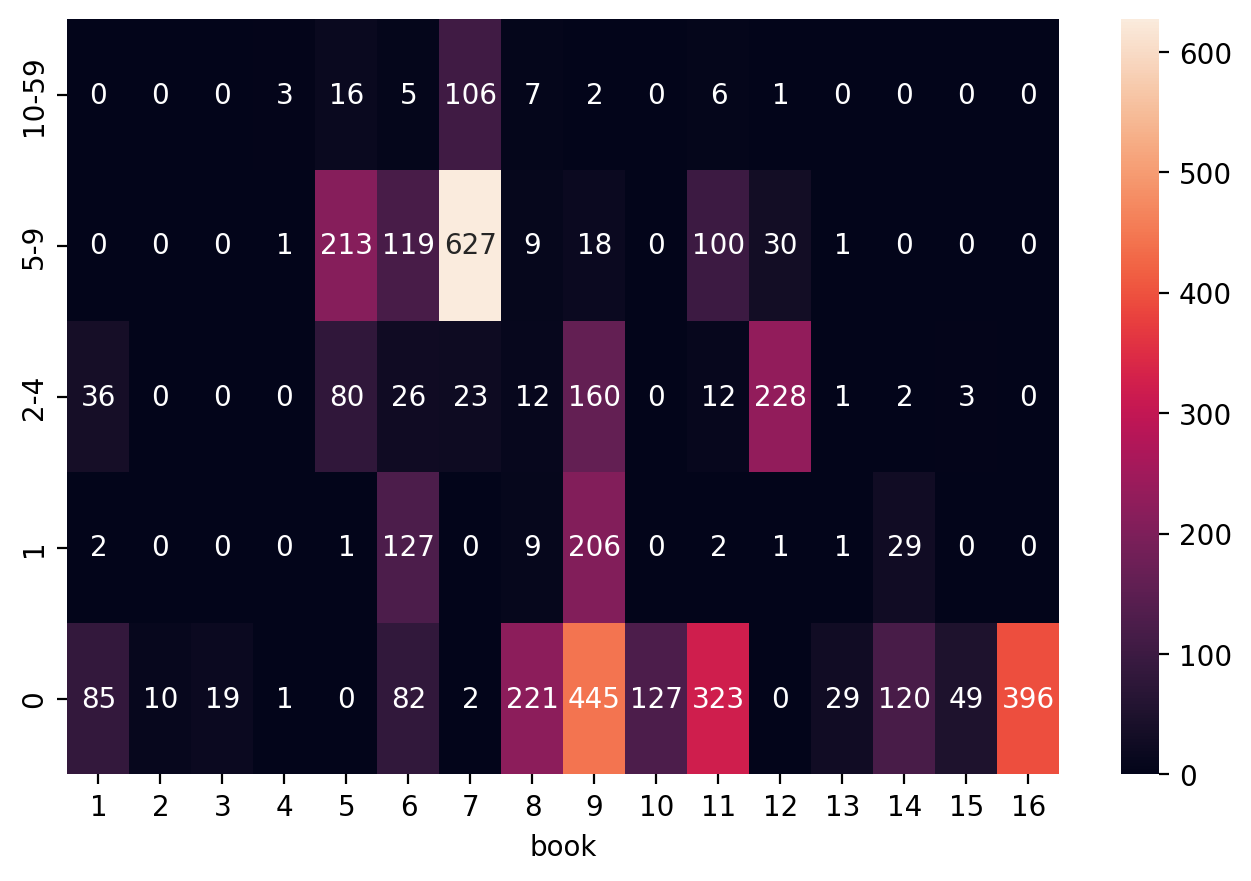

In [35]:
def myapply(df):
    #print(df['count'].value_counts())
    mylist = [0,1,2,5,10,60]
    mycounts = pd.cut(df['count'], mylist, right=False, labels=["0","1","2-4","5-9","10-59"]).value_counts()
    mydict = mycounts.to_dict()
    mydict['book'] = df['book'].values[0]
    return pd.Series(mydict).to_frame().T

dict_list = mykw_df.groupby('book',as_index=False).apply(myapply)
count_df = dict_list.reset_index(drop=True)
count_df = count_df.set_index('book')
count_df_ = count_df[["0","1","2-4","5-9","10-59"][::-1]]
import numpy  as np
#count_df_.loc[:] = np.log(count_df_.values)
plt.figure(dpi=100,figsize=(8,5))
sns.heatmap(count_df_.T,annot=True,fmt='d')

In [36]:
print(mykw_df['count'].value_counts())

0     1909
1      378
4      330
7      291
6      269
8      239
2      168
5      167
9      152
3       85
10      76
11      35
12      20
14       5
13       3
20       1
19       1
53       1
16       1
18       1
15       1
17       1
Name: count, dtype: int64


In [37]:
0
1 
2-4 
5-9
10-60

-50

### BOKEH

In [40]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

### OK - Epigrammes par livre 

In [41]:
# Dictionnaire pour stocker les compteurs de chaque livre
compteurs_livres = {}

# Comptage des éléments par livre
for element in api_data:
    url_livre = element['book']['number']
    
    # Vérification de l'existence de la clé dans le dictionnaire
    if url_livre in compteurs_livres:
        # Incrémentation du compteur
        compteurs_livres[url_livre] += 1
    else:
        # Initialisation du compteur
        compteurs_livres[url_livre] = 1

# Affichage des résultats
for url_livre, compteurs in compteurs_livres.items():
    print(f"Livre : {url_livre}, Nombre d'éléments : {compteurs}")


Livre : 1, Nombre d'éléments : 123
Livre : 2, Nombre d'éléments : 10
Livre : 3, Nombre d'éléments : 19
Livre : 4, Nombre d'éléments : 5
Livre : 5, Nombre d'éléments : 310
Livre : 6, Nombre d'éléments : 359
Livre : 7, Nombre d'éléments : 758
Livre : 8, Nombre d'éléments : 258
Livre : 9, Nombre d'éléments : 831
Livre : 10, Nombre d'éléments : 127
Livre : 11, Nombre d'éléments : 443
Livre : 12, Nombre d'éléments : 260
Livre : 13, Nombre d'éléments : 32
Livre : 14, Nombre d'éléments : 151
Livre : 15, Nombre d'éléments : 52
Livre : 16, Nombre d'éléments : 396


In [42]:
# create a new plot with default tools, using figure
p = figure(width=400, height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.hex(list(compteurs_livres.keys()), list(compteurs_livres.values()), size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

Nous pouvons également représenter cela dans un Pie Chart interactif ! 

In [43]:
from math import pi
import pandas as pd
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.models import Legend, Wedge, ColumnDataSource

x = compteurs_livres

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'livre'})
data['color'] = Category20c[len(x)]

# represent each value as an angle = value / total * 2pi
data['angle'] = data['value']/data['value'].sum() * 2*pi

p = figure(height=450, title="Nombre d'épigrammes par livre", toolbar_location=None,
           tools="hover", tooltips="@livre: @value")

p.wedge(x=0, y=1, radius=0.4, 
        
        # use cumsum to cumulatively sum the values for start and end angles
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='livre', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None
show(p)

In [ ]:
items=[]
for i in range(len(api_data)):
    id_ = api_data[i]['id']
    langs_ = [i['language'] for i in api_data[i]['texts']]
    items.append((id_,langs_))

In [ ]:
my_df=pd.DataFrame(items,columns=['id','langs'])
my_df=my_df.explode('langs')
my_langs = my_df['langs'].value_counts()
#print(my_df[my_df['langs']=='deu'])

In [ ]:
for x in api_data:   
    if x['id']==4049: 
        print(x['url'])

In [ ]:
my_langs_ = my_langs.rename_axis('Langue de Traduction').reset_index(name='Nombre de textes')
#print(my_langs_)
plt.figure(dpi=75)
sns.barplot(data=my_langs_,x='Langue de Traduction',y='Nombre de textes',palette="hls")